### Deriving the same for Photons

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df=pd.read_csv('SM_Thermo.dat', sep='\s+\\s+')
#df.to_csv ('SM_Thermo.csv', index=None)

C:\Users\ashish\AppData\Local\Temp\ipykernel_12324\2298053267.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('SM_Thermo.dat', sep='\s+\\s+')


In [91]:
z_gam=df["z_gam"]
z_nu=df["z_nu"]
gs=df["gs"]
g=df["g*"]
m_e=0.511


#### 1. Plotting:  $\frac{dt}{dz}=\frac{\bigg(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\bigg)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$

* Converting it so that temperature becomes in MeV and the time in seconds, 
 $\frac{dt}{dz}=\frac{\bigg(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\bigg)}{ \sqrt{g_{\ast}(z)}}\frac{4.8}{m_{e}^{2}}$

* We will now approximate the value of $g'_{s}(z)$ for $z_{\gamma}$ using the finite difference method or discrete derivative technique. This involves taking the difference between two successive values of $z_{g}$ from the data file. Since $\Delta z_{g} \rightarrow 0$, this approximation is reasonably accurate.

* The formula for approximating $g'_{s}(z)$ is given by: $g'_{s}(z) = \frac{g_{s}(z_{g}[i+1])-g_{s}(z_{g}[i])}{z_g[i+1]-z_g[i]}$

* $cons=\frac{m_{pl}}{m_{e}^{2}}=\frac{1.22 \times 10^{22}}{(0.511)^{2}}=1.22\times10^{22}/(0.511)^2$ (MeV) 

In [4]:
z_g=np.multiply(1/df['z_gam'],df['a'])

In [11]:
def gprime_s(df):
    x=[]
    for i in range(0,1000,1):
        if(z_g[i+1]!=z_g[i]):
            x.append((df["gs"][i+1]-df["gs"][i])/(z_g[i+1]-z_g[i]))
        else:
            x.append(x[i-1])
    return x

In [12]:
x=gprime_s(df)
x.append(0)
    

#### 1.2 Plot of $g^{\prime}_{s}(z)$ with respect to $z_{\gamma}$

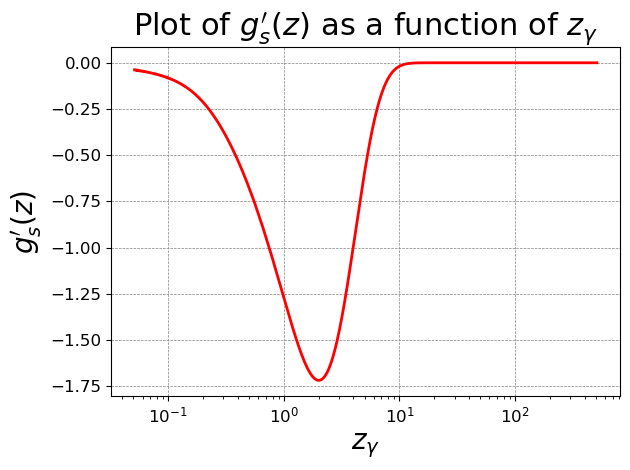

In [13]:
plt.plot(z_g, x, color='red', linewidth=2)
plt.xscale('log')
plt.xlabel(r'$z_\gamma$', fontsize=20)
plt.ylabel(r'$g^{\prime}_{s}(z)$', fontsize=20)
plt.title(r'Plot of $g^{\prime}_{s}(z)$ as a function of $z_\gamma$', fontsize=22)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

In [14]:
cons=4.8/m_e**(2)

In [15]:

func=cons*(-(z_g**(2))*1/3*np.divide(x,df['gs'])+z_g)/(1.66*np.sqrt(df['g*']))

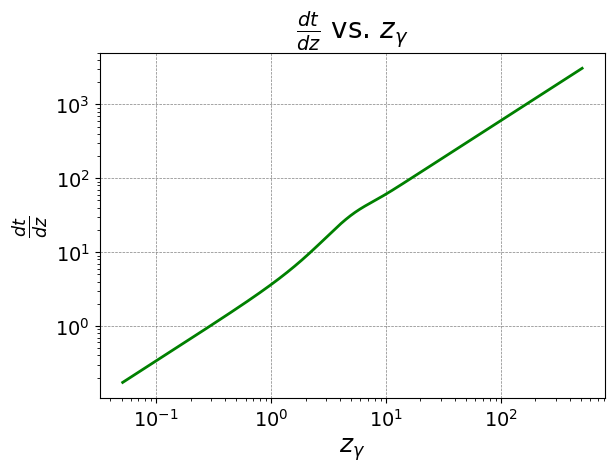

In [18]:
plt.plot(z_g, func, color='green', linewidth=2)
plt.ylabel(r'$\frac{dt}{dz}$', fontsize=18)
plt.xlabel(r'$z_{\gamma}$', fontsize=18)
plt.title(r'$\frac{dt}{dz}$ vs. $z_{\gamma}$', fontsize=20)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

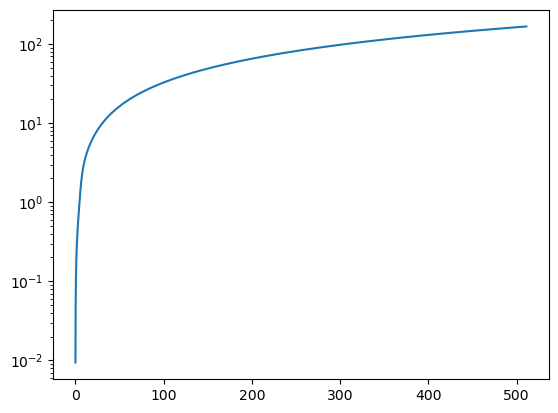

In [26]:
plt.plot(z_g,func/cons)
plt.yscale('log')
#plt.xscale('log')

* Method 2: In this approach, we will attempt to interpolate the function $g_{s}(z)$. By doing so, we can then utilize the finite difference of the interpolated function to obtain the desired result. Interpolation allows us to estimate the values of the function at intermediate points where the discrete values are not explicitly provided.


In [19]:
from scipy import interpolate

In [20]:
f=interpolate.interp1d(z_g,gs)

In [21]:
min(z_g)

0.051099997600057595

In [22]:
max(z_g)

511.0000145934898

In [23]:
x_new=np.linspace(0.051099997600057595,511.0000145934898,10000)

In [24]:
ynew=f(x_new)

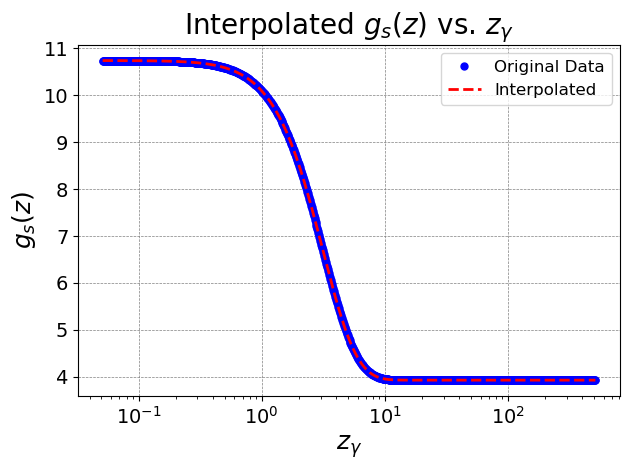

In [25]:
plt.plot(z_g,df['gs'], 'o', color='blue', markersize=5, label='Original Data')
plt.plot(x_new, ynew, '--', color='red', linewidth=2, label='Interpolated')
plt.xscale('log')
plt.xlabel(r'$z_{\gamma}$', fontsize=18)
plt.ylabel(r'$g_{s}(z)$', fontsize=18)
plt.title(r'Interpolated $g_{s}(z)$ vs. $z_{\gamma}$', fontsize=20)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [26]:
def gprime_iplot(f,i):
    diff=(float(f(i+10**(-4)))-float(f(i)))/(10**(-4))
    return diff

In [28]:
new_y=[]
for i in range(0,1000,1):
    if(z_g[i+1]!=z_g[i]):
        new_y.append(gprime_iplot(f,z_g[i]))
    else:
        new_y.append(new_y[i-1])
new_y.append(0.0)

In [32]:
func2=cons*((-z_g**(2))*1/3*np.divide(new_y,df['gs'])+z_g)/(1.66*np.sqrt(df['g*']))

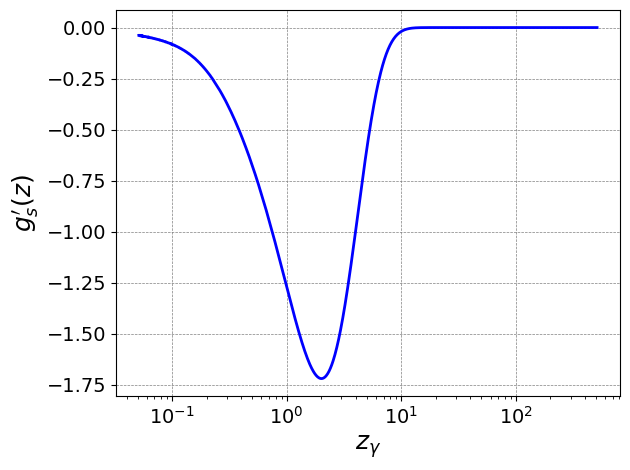

In [33]:
plt.plot(z_g, new_y, color='blue', linewidth=2)
plt.xscale('log')
plt.ylabel(r'$g^{\prime}_{s}(z)$', fontsize=18)
plt.xlabel(r'$z_\gamma$', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

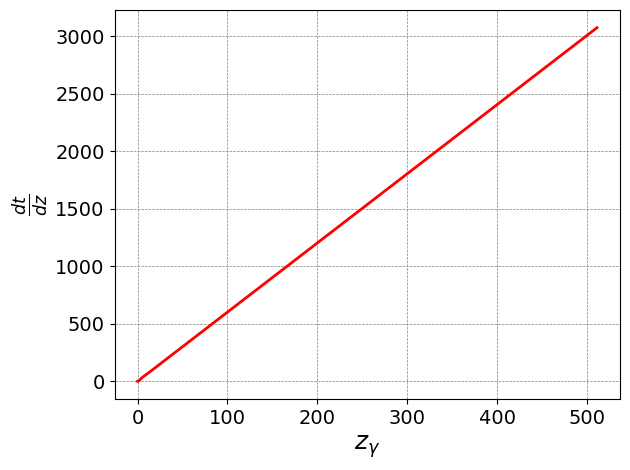

In [34]:
plt.plot(z_g, func, color='red', linewidth=2)
plt.ylabel(r'$\frac{dt}{dz}$', fontsize=18)
plt.xlabel(r'$z_{\gamma}$', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [45]:
g_der_ipol=interpolate.interp1d(z_g,new_y)
g_der=g_der_ipol(x_new)

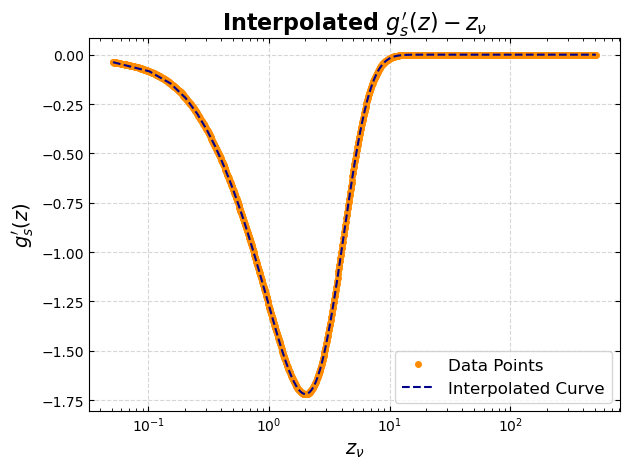

In [47]:
# Plotting the data points
plt.plot(z_g, new_y, 'o', markersize=4, color='darkorange', label='Data Points')


# Plotting the interpolated curve
plt.plot(x_new, g_der, '--', color='darkblue', label='Interpolated Curve')

# Adding labels and title
plt.xlabel(r'$z_{\nu}$', fontsize=14)
plt.ylabel(r'$g^{\prime}_{s}(z)$', fontsize=14)
plt.title(r'Interpolated $g^{\prime}_{s}(z)-z_{\nu}$', fontsize=16, fontweight='bold')

# Setting a logarithmic scale for the x-axis
plt.xscale('log')

# Customize the tick parameters
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Adding a legend
plt.legend(loc='best', fontsize=12)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting plot margins
plt.tight_layout()
plt.savefig('gprime_int',dpi=300)

In [49]:
# Interpolating g*(z)
g_star_ipol=interpolate.interp1d(z_g,g)
g_star=g_star_ipol(x_new)

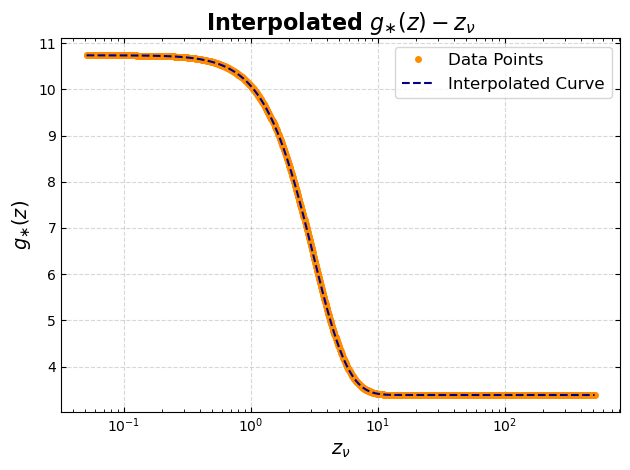

In [51]:
# Plotting the data points
plt.plot(z_g, g, 'o', markersize=4, color='darkorange', label='Data Points')


# Plotting the interpolated curve
plt.plot(x_new, g_star, '--', color='darkblue', label='Interpolated Curve')

# Adding labels and title
plt.xlabel(r'$z_{\nu}$', fontsize=14)
plt.ylabel(r'$g_{\ast}(z)$', fontsize=14)
plt.title(r'Interpolated $g_{\ast}(z)-z_{\nu}$', fontsize=16, fontweight='bold')

# Setting a logarithmic scale for the x-axis
plt.xscale('log')

# Customize the tick parameters
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Adding a legend
plt.legend(loc='best', fontsize=12)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting plot margins
plt.tight_layout()

plt.savefig('gstar_int',)

### Solving $\frac{dt}{dz}$ for $t(z_{\gamma})$

We will adopt the following methodology to solve the differential equation:

### Given:

The differential equation is given by:

$$\frac{dt}{dz} = \frac{\left(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$$

### Let:

Let's define a function $f(z)$ as:

$$f(z) = \frac{\left(-z^{2}\frac{1}{3}\frac{g^{\prime}_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$$

We can rewrite the differential equation as:

$$\int dt = \int f(z) \, dz$$

Integrating both sides, we obtain:

$$t(z) = \int f(z) \, dz$$

To solve this equation, we will use numerical methods to approximate the integral $\int f(z) \, dz$.

This approach allows us to calculate the value of $t(z_{\gamma})$ numerically.



In [52]:
# solving for dt/dz
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
from scipy.integrate import solve_ivp

In [58]:
min(z_g)

z_int=np.sort(z_g)

In [59]:
def dtdz(z_int,t):
    return cons*(-(z_int**(2))*1/3*np.divide(g_der_ipol(z_int),f(z_int))+z_int)/(np.sqrt(g_star_ipol(z_int)))

In [60]:
sol_m1=solve_ivp(dtdz,t_span=(min(z_int),max(z_int)),y0=[0.007387],t_eval=z_int)

In [61]:
t_znew=sol_m1.y[0]

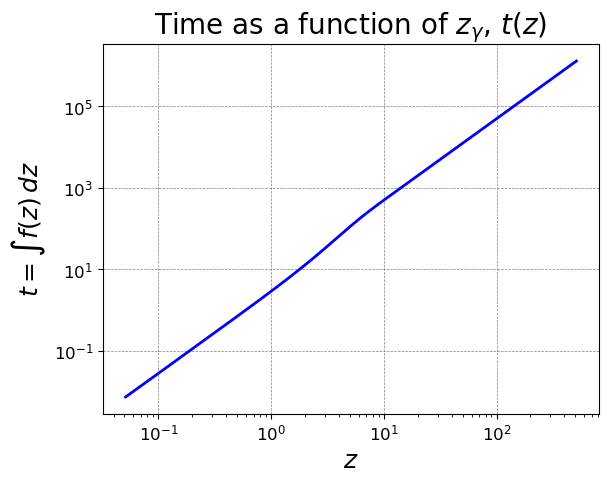

In [63]:
# Plotting
plt.plot(z_g, t_znew, color='blue', linewidth=2)

# Labels and title
plt.xlabel(r'$z$', fontsize=18)
plt.ylabel(r'$t = \int f(z) \, dz$', fontsize=18)
plt.title(r'Time as a function of $z_{\gamma}$, $t(z)$', fontsize=20)

# Gridlines
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Tick labels
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xscale('log')
plt.yscale('log')

In [65]:
a_0 = 1
a_1 = 0.15735
a_2 = 4.6172
a_3 = -0.40520e2
a_4 = 0.13875e3
a_5 = -0.59898e2
a_6 = 0.66752e2
a_7 = -0.16705e2
a_8 = 3.8071
a_9 = -0.39140
a_10 = 0.023590
a_11 = -0.83696e-4
a_12 = -0.42095e-4
a_13 = 0.17675e-5
q_np = 0.33979

b_0 = -0.62173
b_1 = 0.22211e2
b_2 = -0.72798e2
b_3 = 0.11571e3
b_4 = -0.11763e2
b_5 = 0.45521e2
b_6 = -3.7973
b_7 = 0.41266
b_8 = -0.026210
b_9 = 0.87934e-3
b_10 = -0.12016e-4
q_pn = 2.8602
tau=8.7945e2
m_e=0.511

a_values = [a_0, a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, a_10, a_11, a_12, a_13]
b_values = [b_0, b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10]


#### Neutron Abundance
 $$\dot{X_{n}}=-\lambda_{np}X_{n}+\lambda_{pn}(1-X_{n})$$
* We have to solve the above equation using `dt/dz`, that we have found from the above prcedure
* In the above equation the $\lambda_{np}$ repersents the forward $n \leftrightarrow p$ and $\lambda_{pn}$ $ \implies $$p \leftrightarrow n$

Limiting the range of validity to $ 0.01 \leq T \leq 10 MeV$, we calculate the corresponding values of $z$ using the function below

In [84]:
znu = []
for x in z_int:
    if (1 / x) * m_e >= 0.01:
        znu.append(x)

In [85]:
min(znu)

0.051099997600057595

In [101]:
# Define the weak rate function for n <--> p
def lambda_np(z):
    value = 0
    for i in range(0, 14):
        value += a_values[i] * z ** (-i)
    w_rate = (value * np.exp(-q_np / z)) / tau
    return w_rate

# Define the weak rate function for p <--> n
"""
def lambda_pn(z):
    value = 0
    e = (1 / z) * m_e
    if (e <= 0.1 or e <= 10):
        for i in range(1, 11):
            value += b_values[i] * z ** (-i)
        weak_rate = (value * np.exp(-q_pn * z)) / tau
    elif (e >=0.01 or e < 0.1):
        weak_rate = 0
    return weak_rate
"""
def lambda_pn(z):
    value = 0
    e = (1 / z) * m_e
    if 0.1 <= e <= 10.00000046965607:
        for i in range(1, 11):
            value += b_values[i] * z ** (-i)
        weak_rate = (value * np.exp(-q_pn * z)) / tau
    elif 0.01 <= e < 0.1:
        weak_rate = 0
    return weak_rate

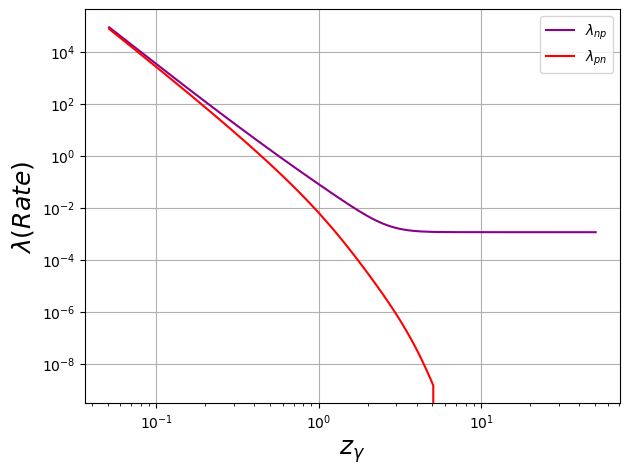

In [103]:
n_prate=[]
p_nrate=[]
for j in znu:
    n_prate.append(lambda_np(j))
    p_nrate.append(lambda_pn(j))
    
plt.plot(znu,n_prate,color='darkmagenta',label=r'$\lambda_{np}$')
plt.plot(znu,p_nrate,color='red',label=r'$\lambda_{pn}$')
plt.yscale('log')
plt.xlabel(r'$z_{\gamma}$',fontsize=18)
plt.ylabel(r'$\lambda (Rate)$',fontsize=18)
plt.grid("True")
plt.tight_layout()
plt.xscale('log')
plt.legend()

In [104]:
# defining f(z) that we have defined as dt/dz
def f_right(z):
    return cons*(-(z**(2))*1/3*np.divide(g_der_ipol(z),f(z))+z)/(1.66*np.sqrt(g_star_ipol(z)))

#defining the differential equation
def dxdz(z,x):
    solution=lambda_pn(z)*f_right(z)-(lambda_np(z)+lambda_pn(z))*f_right(z)*x
    return solution


In [128]:
sol_xz=solve_ivp(dxdz,t_span=(min(znu),max(znu)),y0=[0.463],t_eval=znu)
x_znew=sol_xz.y[0]

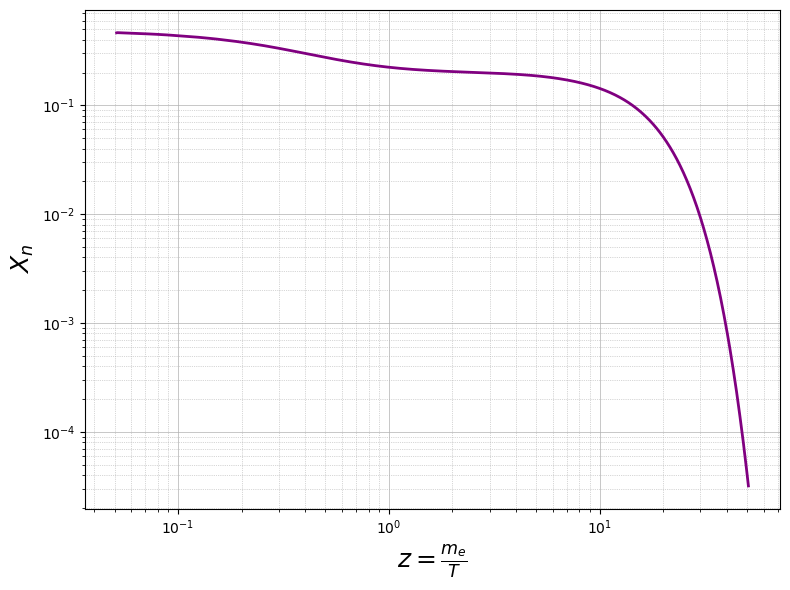

In [129]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(znu, x_znew, color='purple', linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$z=\frac{m_e}{T}$', fontsize=18)
ax.set_ylabel(r'$X_{n}$', fontsize=18)


ax.grid(True, which='both', linestyle='-', linewidth=0.5)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

In [126]:
min(z_int)

0.051099997600057595